In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,f1_score

In [130]:
path='Wheat-Punjab.csv'
df=pd.read_csv(path) 


In [131]:
df

,District,Year,Rain_Jan,Rain_Feb,Rain_Mar,Rain_Apr,Rain_May,Rain_Jun,Rain_Jul,Rain_Aug,...,Medium_S,High_S,Low_Zn,Medium_Zn,High_Zn,Area,Production,Yield,Latitude,Longitude
0,Amritsar,1968,25.550,22.654,9.441,3.080,5.784,28.050,123.044,166.489,...,44.0,56.0,0.0,96.0,4.0,177.0,278.0,1570.0,31.6340,74.8723
1,Amritsar,1969,7.326,8.259,18.133,16.161,18.819,20.919,192.023,99.627,...,44.0,56.0,0.0,96.0,4.0,214.0,501.0,2342.0,31.6340,74.8723
2,Amritsar,1970,21.112,19.301,17.347,0.427,19.214,51.602,59.335,168.687,...,44.0,56.0,0.0,96.0,4.0,226.0,606.0,2680.0,31.6340,74.8723
3,Amritsar,1971,5.950,13.320,5.954,15.730,31.289,64.839,151.622,268.577,...,44.0,56.0,0.0,96.0,4.0,242.0,563.0,2326.0,31.6340,74.8723
4,Amritsar,1972,8.053,15.021,5.274,6.788,0.505,16.619,138.495,136.217,...,44.0,56.0,0.0,96.0,4.0,228.0,654.0,2749.0,31.6340,74.8723
5,Amritsar,1973,15.884,13.456,9.886,0.820,14.928,37.032,123.026,212.153,...,44.0,56.0,0.0,96.0,4.0,248.0,545.0,2198.0,31.6340,74.8723
6,Amritsar,1974,5.426,6.417,2.895,1.005,9.529,23.119,186.212,77.880,...,44.0,56.0,0.0,96.0,4.0,246.0,504.0,2051.0,31.6340,74.8723
7,Amritsar,1975,22.977,19.721,17.087,2.310,1.203,91.871,221.747,144.857,...,44.0,56.0,0.0,96.0,4.0,246.0,560.0,2276.0,31.6340,74.8723
8,Amritsar,1976,9.718,25.751,12.587,10.167,18.259,55.236,174.073,421.302,...,44.0,56.0,0.0,96.0,4.0,255.0,618.0,2424.0,31.6340,74.8723
9,Amritsar,1977,22.459,0.874,1.222,26.652,36.966,73.858,190.869,124.402,...,44.0,56.0,0.0,96.0,4.0,271.0,676.0,2493.0,31.6340,74.8723


In [132]:
df["District"].unique()

array(['Amritsar', 'Bathinda', 'Faridkot', 'Fatehgarh Sahib', 'Ferozpur',
       'Gurdaspur', 'Hoshiarpur', 'Jalandhar', 'Kapurthala', 'Ludhiana',
       'Mansa', 'Moga', 'Muktsar', 'Nawanshahar', 'Patiala', 'Ropar',
       'Sangrur'], dtype=object)

In [133]:
# Data missing information for train
data_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
data_info=data_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
data_info=data_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(data_info)

,District,Year,Rain_Jan,Rain_Feb,Rain_Mar,Rain_Apr,Rain_May,Rain_Jun,Rain_Jul,Rain_Aug,...,Medium_S,High_S,Low_Zn,Medium_Zn,High_Zn,Area,Production,Yield,Latitude,Longitude
column type,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
null values (nb),0,0,22,23,21,20,20,21,18,18,...,393,393,393,393,393,161,161,161,0,0
null values (%),0,0,2.60973,2.72835,2.4911,2.37248,2.37248,2.4911,2.13523,2.13523,...,46.6192,46.6192,46.6192,46.6192,46.6192,19.0985,19.0985,19.0985,0,0


In [134]:
df["Longitude"]=df["Longitude"].astype(float)
type(df["Longitude"].values[78])

numpy.float64

In [135]:
A=df["District"].values
D=df["Year"].values

In [136]:
df=df.dropna(subset=['Yield'])

['Amritsar' 'Bathinda' 'Faridkot' 'Fatehgarh Sahib' 'Ferozpur' 'Gurdaspur'
 'Hoshiarpur' 'Jalandhar' 'Kapurthala' 'Ludhiana' 'Mansa' 'Moga' 'Muktsar'
 'Patiala' 'Ropar' 'Sangrur']


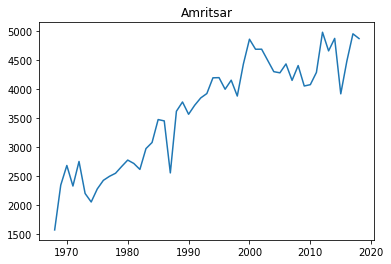

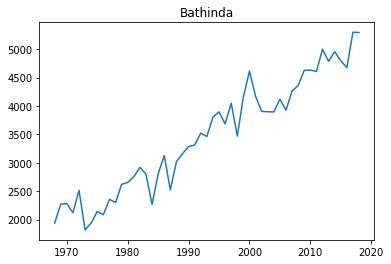

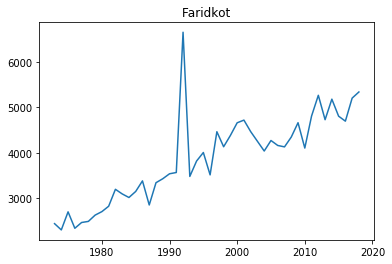

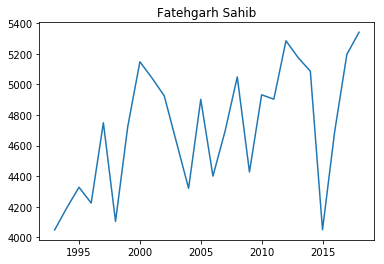

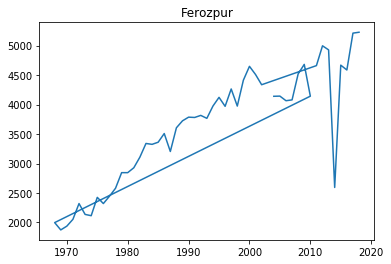

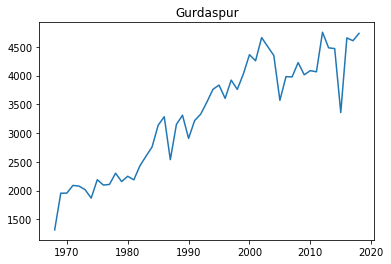

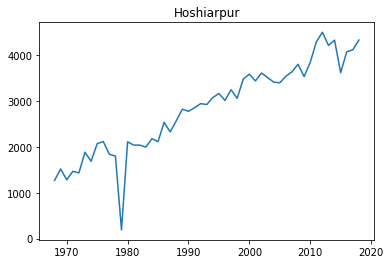

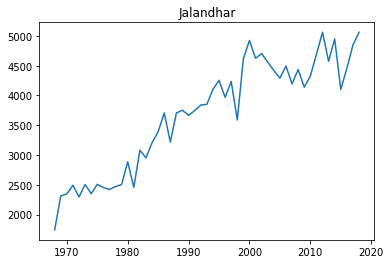

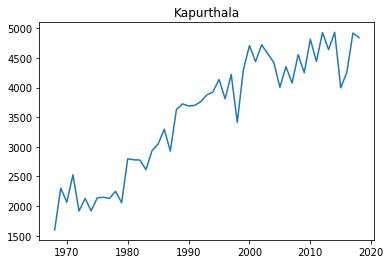

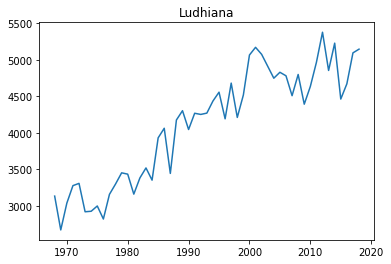

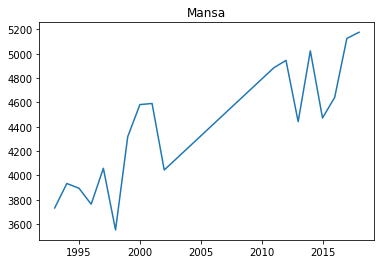

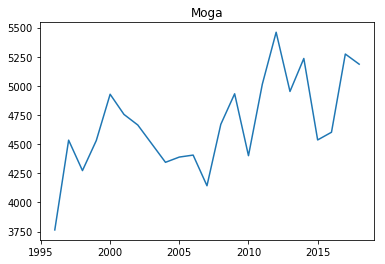

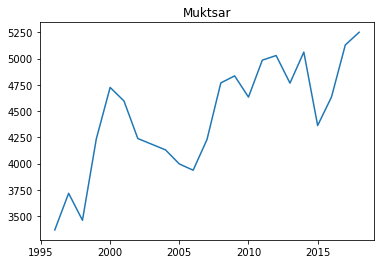

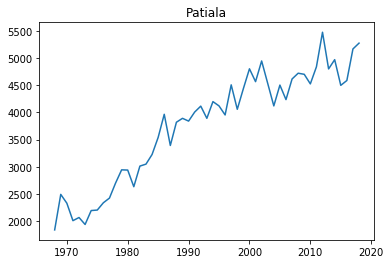

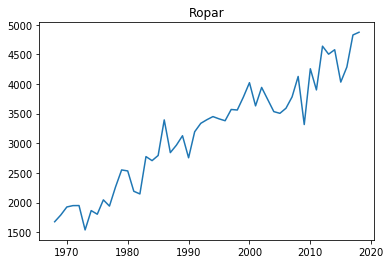

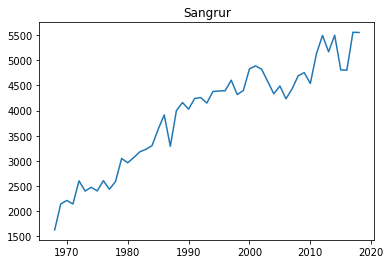

In [137]:
a=df["District"].unique()
print(a)
for i in range(len(a)):
    b='df_'+str(a[i])
    b=df[df.District==a[i]]
    #print(b)
    plt.plot(b["Year"],b["Yield"])
    plt.title(a[i])
    plt.show()

In [25]:
df=df.sort_values(by="Year")
Yield=df["Yield"]
window = Yield.expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), Yield.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))
df["Yield_min"]=dataframe["min"]
df["Yield_mean"]=dataframe["mean"]
df["Yield_max"]=dataframe["max"]
df["Yield_lag"]=dataframe["t+1"]
#df["Yield_lag_1"]=dataframe["t+2"]


        min         mean     max     t+1
0    1570.0  1570.000000  1570.0  1676.0
623  1570.0  1623.000000  1676.0  1939.0
42   1570.0  1728.333333  1939.0  1839.0
581  1570.0  1756.000000  1939.0  1998.0
175  1570.0  1804.400000  1998.0  1628.0


In [138]:
df.tail()

,District,Year,Rain_Jan,Rain_Feb,Rain_Mar,Rain_Apr,Rain_May,Rain_Jun,Rain_Jul,Rain_Aug,...,Medium_S,High_S,Low_Zn,Medium_Zn,High_Zn,Area,Production,Yield,Latitude,Longitude
838,Sangrur,2014,14.1,7.4,33.1,13.8,30.5,13.2,22.2,24.5,...,78.0,2.0,3.0,27.0,70.0,285.0,1567.0,5498.0,30.2458,75.8421
839,Sangrur,2015,23.5,20.1,40.5,40.3,18.4,68.8,107.6,90.4,...,78.0,2.0,3.0,27.0,70.0,284.0,1366.0,4809.0,30.2458,75.8421
840,Sangrur,2016,0.3,6.0,38.4,0.3,37.2,52.9,148.4,91.9,...,78.0,2.0,3.0,27.0,70.0,286.0,1373.0,4802.0,30.2458,75.8421
841,Sangrur,2017,41.0,2.8,14.1,8.6,8.9,76.8,44.9,54.4,...,78.0,2.0,3.0,27.0,70.0,286.0,1589.0,5557.0,30.2458,75.8421
842,Sangrur,2018,10.3,2.7,1.8,12.5,9.4,94.5,184.1,55.5,...,78.0,2.0,3.0,27.0,70.0,288.0,1599.0,5552.0,30.2458,75.8421


In [142]:
df=df.sort_values(by='District')
#for i in range(df.shape[0]):
x=0
for k in range(len(districts)):
    #print('x',x)
    for row in df:

        A=list(df[row].isnull())
        #print(len(A))
        #print(count[districts[k]])
        for i in range(count[districts[k]]):
            
            if A[x+i]==True:
                if i%(count[districts[k]]+1)!=0:
                    #print(df[row].values[i-1],df[row].values[i+1])
                    df[row].values[x+i]=(df[row].values[x+i-1])
                else:
                    for j in range(i,i+count[districts[k]]):
                        if A[x+j]==False:
                            df[row].values[x+i]=(df[row].values[x+j])
    #print('i',i)
    x=x+count[districts[k]]
            
           

In [13]:
df=df.drop('District',axis=1)
df.shape

(682, 80)

In [114]:
df=df.sort_values(by='Year')
df.shape

(682, 81)

In [152]:
train=train.sort_values(by='Year')
for i in range(train.shape[0]):
    if train["Year"].values[i]==2018:
        print(i)
        break
train['Year'].values[666]    

666


2018

In [143]:
test=df['Yield']

In [144]:
train=df.drop(['Production','Yield'],axis=1)

In [154]:
train=train.drop(['District','Year'],axis=1)
x_train=train.iloc[:666,:]
y_train=test.iloc[:666]
print(x_train.shape)
x_test=train.iloc[666:,:]
y_test=test.iloc[666:]

(666, 149)


In [155]:
import xgboost as xgb

In [156]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.7,
                 gamma=0.4,                     
                 learning_rate=0.01,
                 max_depth=35,
                 min_child_weight=1.5,
                 n_estimators=3000,                                                                    
                 reg_alpha=4.5,
                 reg_lambda=0.2,
                 subsample=0.7,
                 colsample_bylevel=0.6,
                 colsample_bynode=0.6,
                 #max_delta_step=0, 
                 #n_jobs=10,
                 #booster='dart',
                 #sample_type='weighted',
                 #skip_drop=0.2,
                 #normalize_type='forest'
                 
                 )
best_xgb_model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:59:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bynode=0.6, colsample_bytree=0.7, gamma=0.4,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=35, min_child_weight=1.5, missing=None, n_estimators=3000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=4.5, reg_lambda=0.2, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.7, verbosity=1)

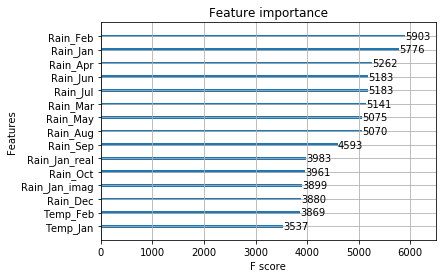

In [157]:
from xgboost import plot_importance
plot_importance(best_xgb_model,max_num_features=15)
plt.show()


In [158]:
B = best_xgb_model.predict(x_test,ntree_limit=1000)
C=best_xgb_model.predict(x_train)

In [58]:
df_predict=pd.DataFrame()
df_predict["given"]=y_train

In [59]:
df_predict["predict"]=C

In [77]:
x_train['predict']=C


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
x_train["district"]=A[:539]
x_train["year"]=D[:539]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['Amritsar' 'Ferozpur' 'Gurdaspur' 'Hoshiarpur' 'Jalandhar' 'Bathinda'
 'Ludhiana' 'Patiala' 'Ropar' 'Kapurthala' 'Sangrur' 'Faridkot' 'Mansa'
 'Fatehgarh Sahib' 'Moga' 'Muktsar']
x_train_Amritsar


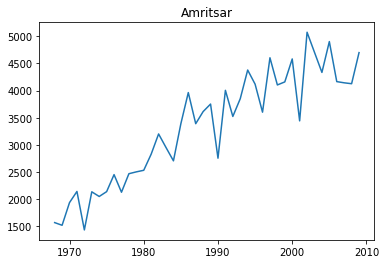

x_train_Ferozpur


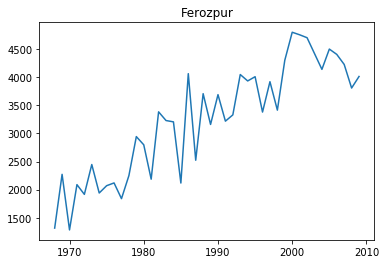

x_train_Gurdaspur


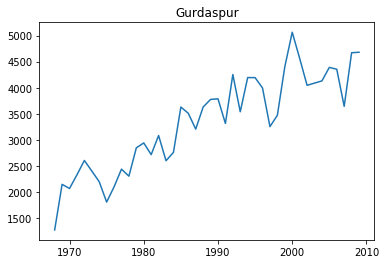

x_train_Hoshiarpur


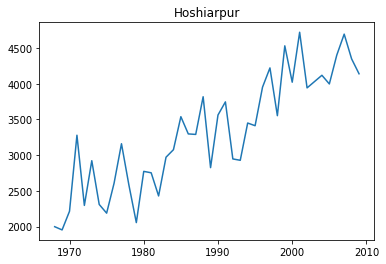

x_train_Jalandhar


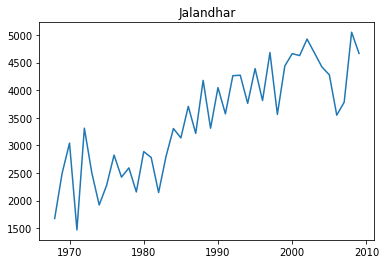

x_train_Bathinda


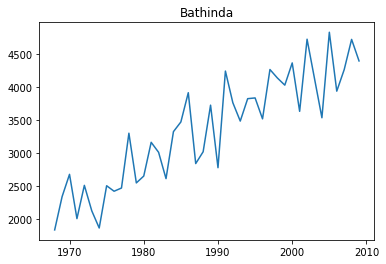

x_train_Ludhiana


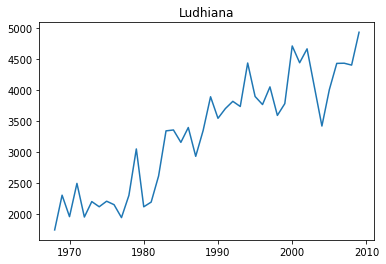

x_train_Patiala


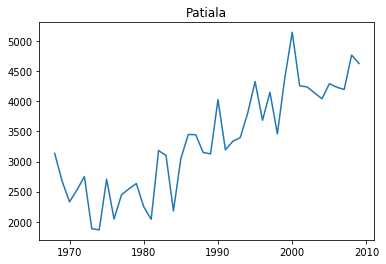

x_train_Ropar


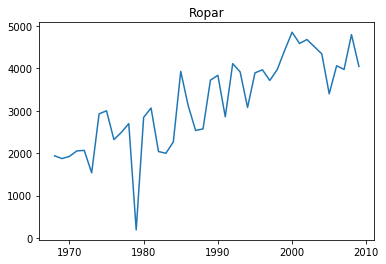

x_train_Kapurthala


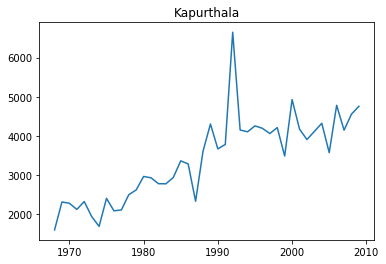

x_train_Sangrur


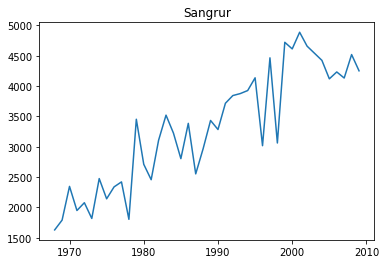

x_train_Faridkot


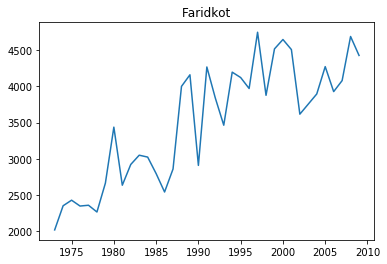

x_train_Mansa


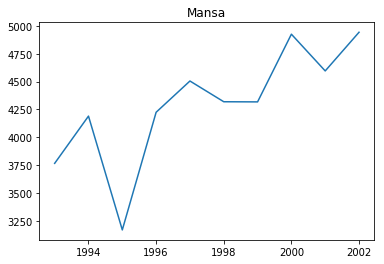

x_train_Fatehgarh Sahib


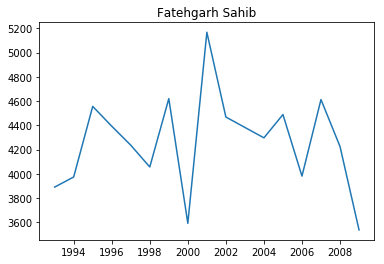

x_train_Moga


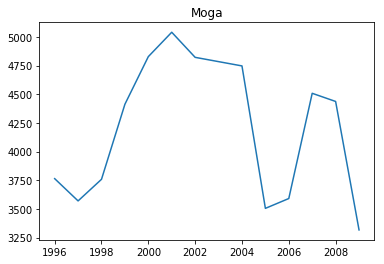

x_train_Muktsar


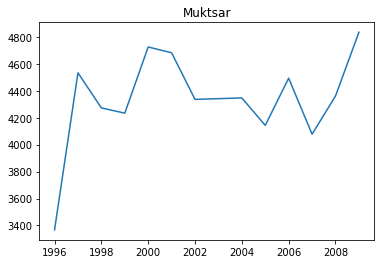

In [103]:
x_train=x_train.sort_values(by="year")
a=x_train["district"].unique()
print(a)
for i in range(len(a)):
    b='x_train_'+str(a[i])
    print(b)
    b=x_train[x_train.district==a[i]]
    
    plt.plot(b["year"],b["predict"])
    plt.title(a[i])
    plt.show()

In [159]:
from sklearn.metrics import r2_score
print(r2_score(y_train,C))
print(r2_score(y_test,B))

0.9999998526012853
-0.40455237206343186


In [160]:
print(mean_absolute_error(y_train,C))
print(mean_absolute_error(y_test,B))

0.27093684565913567
724.7676544189453


In [161]:
def eval(pred_test,test):
  
  #check=[]
  #difference=[]
  #log_error=[]
  #check.append(model(train.float()))
  for i in range(len(test)):
    log_error=np.abs(np.log(pred_test+1)-np.log(test+1))
    #log_error[i]=torch.log(difference[i])
  a=np.power(log_error,2)
  #x=np.array(a)
  b=np.mean(a)
  c=np.power(b,0.5)
  #print(c)
  return c

In [162]:
print(eval(C,y_train))
print(eval(B,y_test))

0.0007347731559559028
0.2655682071237394


D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:42:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:42:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:43:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:43:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:43:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>> Mean CV score is:  0.221


D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


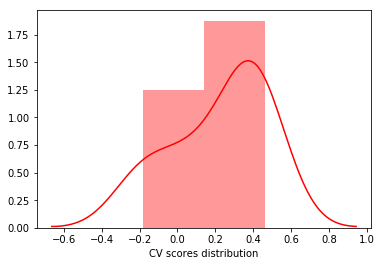

In [341]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_xgb_model, x_train, y_train, cv=5)
print('>> Mean CV score is: ', round(np.mean(scores),3))
pltt = sns.distplot(pd.Series(scores,name='CV scores distribution'), color='r')


In [139]:
from scipy import fftpack

In [140]:
train=train.sort_values(by="District")
train.head()

,District,Rain_Jan,Rain_Feb,Rain_Mar,Rain_Apr,Rain_May,Rain_Jun,Rain_Jul,Rain_Aug,Rain_Sep,...,VP_Aug_real,VP_Aug_imag,VP_Sep_real,VP_Sep_imag,VP_Oct_real,VP_Oct_imag,VP_Nov_real,VP_Nov_imag,VP_Dec_real,VP_Dec_imag
0,Amritsar,25.550,22.654,9.441,3.080,5.784,28.050,123.044,166.489,13.201,...,247256.659000,0.000000,222253.824000,0.000000,162163.799000,0.000000,111220.297000,0.000000,89247.002000,0.000000
21,Amritsar,39.751,5.654,18.833,1.665,7.888,34.519,181.606,126.948,59.192,...,1797.898175,-9199.029648,736.109149,-6914.471031,1182.610389,-5529.742384,-11.769408,-2975.639197,595.356769,-2724.466792
28,Amritsar,23.096,22.925,12.699,3.443,13.991,156.196,107.929,244.225,59.235,...,11389.963838,-10870.672870,8722.222787,-9371.215106,7209.000168,-7094.030104,4547.809403,-5139.302667,3664.199096,-3316.368181
29,Amritsar,17.742,8.003,13.174,33.754,23.316,102.219,205.637,262.477,49.984,...,22905.061186,-811.250078,19827.852202,-1293.629810,15390.280683,-432.991417,11052.319145,-7.533914,8170.933128,26.976237
4,Amritsar,8.053,15.021,5.274,6.788,0.505,16.619,138.495,136.217,111.541,...,21202.325052,18752.671666,19238.738462,16850.747195,13972.574895,13139.765591,9300.155062,10175.589612,7858.419266,7824.742699


In [141]:
districts=['Amritsar', 'Ludhiana', 'Patiala', 'Kapurthala', 'Jalandhar','Ferozpur', 'Ropar', 'Hoshiarpur', 'Sangrur','Bathinda', 'Gurdaspur', 'Faridkot', 'Mansa', 'Fatehgarh Sahib', 'Muktsar', 'Moga']
print(districts[7])

Hoshiarpur


In [101]:
X=fftpack.fft(df["Rain_Jan"])
X.real.shape

(682,)

In [145]:
count={}
for j in range(len(districts)):
    count[districts[j]]=0
    for i in range(train.shape[0]):
        
        if train["District"].values[i]==districts[j]:
            count[districts[j]]=count[districts[j]]+1
print(count)

{'Amritsar': 50, 'Ludhiana': 50, 'Patiala': 50, 'Kapurthala': 50, 'Jalandhar': 50, 'Ferozpur': 50, 'Ropar': 50, 'Hoshiarpur': 50, 'Sangrur': 50, 'Bathinda': 50, 'Gurdaspur': 50, 'Faridkot': 45, 'Mansa': 18, 'Fatehgarh Sahib': 25, 'Muktsar': 22, 'Moga': 22}


In [126]:
fftpack.fft(train["Rain_Jan"].values[:4])

array([113.44 +0.j  ,  17.15-59.11j, -45.54 +0.j  ,  17.15+59.11j])

In [146]:
#for j in range(len(districts)):
#for i in range(0,train.shape[0],51):

#if train["District"].values[i]==districts[j]:
for row in train:
    if row=="Rain_Jan":
        X=fftpack.fft(train[row])
        a=str(row)
        #print(a+'_real',X.shape)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Feb":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Mar":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Apr":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_May":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Jun":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Jul":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Aug":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Sep":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Oct":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Nov":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Rain_Dec":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Jan":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Feb":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Mar":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Apr":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_May":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Jun":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Jul":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Aug":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Sep":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Oct":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Nov":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="Temp_Dec":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Jan":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Feb":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Mar":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Apr":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_May":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Jun":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Jul":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Aug":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Sep":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Oct":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Nov":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag
    if row=="VP_Dec":
        X=fftpack.fft(train[row])
        a=str(row)
        train[a+'_real']=X.real
        train[a+'_imag']=X.imag



    #print(a+'_real',X.real.shape)
    



In [147]:
#for j in range(len(districts)):
x=0
for k in range(len(districts)):
    
    #for i in range(count[districts[k]]):
    #if train["District"].values[i]==districts[j]:
        for row in train:
            if row=="Rain_Jan":
                X=fftpack.fft(train[row].values[x:x+count[districts[k]]])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Feb":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Mar":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Apr":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_May":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Jun":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Jul":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Aug":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Sep":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Oct":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Nov":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Rain_Dec":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Jan":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Feb":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Mar":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Apr":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_May":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Jun":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Jul":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Aug":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Sep":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Oct":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Nov":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="Temp_Dec":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Jan":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Feb":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Mar":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Apr":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_May":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Jun":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Jul":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Aug":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Sep":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Oct":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Nov":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
            if row=="VP_Dec":
                X=fftpack.fft(train[row])
                a=str(row)
                for j in range(count[districts[k]]):
                    train[a+'_real'].values[x+j]=X.real[j]
                    train[a+'_imag'].values[x+j]=X.imag[j]
        
        x=x+count[districts[k]]

        


            #train[a+'_real']=X.real
            #train[a+'_imag']=X.imag



In [38]:
for row in train:
    if row=="Rain_Jan":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Feb":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Mar":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Apr":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_May":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Jun":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Jul":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Aug":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Sep":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Oct":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Nov":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Rain_Dec":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Jan":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Feb":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Mar":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Apr":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_May":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Jun":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Jul":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Aug":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Sep":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Oct":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Nov":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Temp_Dec":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Jan":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Feb":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Mar":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Apr":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_May":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Jun":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Jul":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Aug":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Sep":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Oct":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Nov":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="VP_Dec":
        X=fftpack.dct(df[row])
        a=str(row)
    if row=="Area":
        X=fftpack.dct(df[row])
        a=str(row)
    train[a+'_dct']=X
    
    
train.shape

(554, 118)

In [148]:
train.head()

,District,Year,Rain_Jan,Rain_Feb,Rain_Mar,Rain_Apr,Rain_May,Rain_Jun,Rain_Jul,Rain_Aug,...,VP_Aug_real,VP_Aug_imag,VP_Sep_real,VP_Sep_imag,VP_Oct_real,VP_Oct_imag,VP_Nov_real,VP_Nov_imag,VP_Dec_real,VP_Dec_imag
0,Amritsar,1968,25.550,22.654,9.441,3.080,5.784,28.050,123.044,166.489,...,236333.601000,0.000000,212345.602000,0.000000,155274.975000,0.000000,105747.422000,0.000000,85474.273000,0.000000
27,Amritsar,1995,27.209,57.380,28.503,5.299,0.661,51.676,122.117,274.048,...,58801.131229,171161.106456,54132.820479,154223.920607,40040.528179,113713.420507,27075.477168,77032.947012,23208.445798,61389.537651
28,Amritsar,1996,23.096,22.925,12.699,3.443,13.991,156.196,107.929,244.225,...,-89956.234822,46563.144979,-80036.888824,43288.483016,-58978.897263,32202.903079,-39696.489510,21506.874579,-30000.019125,18698.246876
29,Amritsar,1997,17.742,8.003,13.174,33.754,23.316,102.219,205.637,262.477,...,15396.251396,-53111.234830,13153.078907,-46361.886022,9476.660100,-34122.344134,6836.310914,-22695.088614,5398.502202,-16129.880758
30,Amritsar,1998,10.347,26.752,23.837,16.769,12.331,20.569,186.189,136.171,...,67710.144303,50719.471050,59983.272401,45506.072332,44583.336905,33660.454083,29462.027710,23129.034712,22906.851495,19114.196750
